# Análisis de Datos Exploratorio
Se levantará el dataset guardado en el notebook de preparación de datos, para poder analizarlo.

In [1]:
import pandas as pd
import os
import json
import ast
import numpy as np
from pyprojroot import here
import sys
sys.path.append(here())
from utils.utils import normalizar_lineas_procesador, separar_valor_ram
    

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 


In [4]:
path = here() / "data"

In [5]:
df = pd.read_csv(path / "datos_laptops_transformed.csv", sep = ";")

## Preview del dataset

In [6]:
df.head(3)

,id,title,seller_id,price,base_price,deal_ids,initial_quantity,sold_quantity,listing_type_id,available_quantity,sold_quantity.1,sale_terms,condition,installment,display_size,shipping_cost,descriptions,attributes,warnings,status,date_created,shipping.mode,shipping.free_shipping,Tipo de batería,Marca,Cantidad de núcleos,Resolución de la pantalla,Tamaño de la pantalla,Tipo de pantalla,Tarjeta gráfica,Es 2 en 1,Es gamer,Es ultrabook,Condición del ítem,Línea,Modelo,Edición del sistema operativo,Nombre del sistema operativo,Versión del sistema operativo,Marca del procesador,Línea del procesador,Memoria RAM,Tipo de memoria RAM,Capacidad del SSD,Cantidad total de puertos USB,Peso,Con Bluetooth,Con puerto ethernet,Con HDMI,Con salida para auriculares,Con lector de tarjeta de memoria,Con micrófono,Con pantalla táctil,Con cámara web,Con Wi-Fi,Profundidad,Altura,Modos de sonido,Puertos USB,Puertos de video,Ancho,Con USB,Modelo del procesador,Tipo de garantía_x,Tiempo de garantía_x,Tipo de garantía_y,Tiempo de garantía_y
0,MLA1151530200,Notebook Lenovo Ideapad 3 14iil05 Intel Core I...,174556876,89999.00000,89999.00000,['MLA6015'],105,50,gold_special,1,50,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",new,yes,hasta 14.1,free,[],"[{'id': 'BATTERY_TYPE', 'name': 'Tipo de bater...",[],active,2022-08-11T16:12:19.000Z,me2,True,Ion de litio,Lenovo,2.00000,1920 px x 1080 px,"14 """,LCD,Intel UHD Graphics,No,No,No,Nuevo,IDEAPAD 3,14IIL05,S,Windows,11,Intel,Core i3,8 GB,DDR4,128 GB,3.00000,1.6 kg,Sí,No,Sí,Sí,Sí,Sí,No,Sí,Sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1005G1,Garantía de fábrica,12 meses,Garantía de fábrica,12 meses
1,MLA1149134293,Notebook Lenovo Ideapad 14iil05 Platinum Gray...,335450469,132616.00000,132616.00000,[],75,50,gold_special,1,50,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",new,yes,hasta 14.1,free,[],"[{'id': 'ALPHANUMERIC_MODEL', 'name': 'Modelo ...",[],active,2022-08-01T19:07:12.000Z,me2,True,Polímero de litio,Lenovo,4.00000,1920 px x 1080 px,"14 """,LCD,Intel UHD Graphics G1,NaN,NaN,NaN,Nuevo,IdeaPad,3,Home,Windows,10,Intel,Core i5,8 GB,DDR4,512 GB,3.00000,1.6 kg,Sí,No,Sí,Sí,Sí,Sí,No,Sí,Sí,241 mm,19.9 mm,"Dolby Audio,Stereo","2.0,3.2",HDMI,327.1 mm,Sí,1035G1,Garantía del vendedor,6 meses,Garantía del vendedor,6 meses
2,MLA1135443731,"Notebook Exo Smart L33e Gris 14 , Intel Celero...",25704919,59999.00000,59999.00000,"['MLA8258', 'MLA9166', 'MLA6015']",482,250,gold_special,1,250,"[{'id': 'INVOICE', 'name': 'Facturación', 'val...",new,yes,hasta 14.1,free,[],"[{'id': 'ASPECT_RATIO', 'name': 'Relación de a...",[],active,2022-05-04T15:42:38.000Z,me2,True,NaN,EXO,2.00000,1366 px x 768 px,"14 """,LED,Intel UHD Graphics 600,NaN,NaN,NaN,Nuevo,Smart,L33E,Home,Windows,10,Intel,Celeron,4 GB,DDR4,64 GB,2.00000,1350 g,Sí,NaN,Sí,Sí,Sí,Sí,NaN,Sí,Sí,216 mm,22.2 mm,NaN,"2.0,3.0",Mini-HDMI,327 mm,Sí,N4020,Garantía de fábrica,12 meses,Garantía de fábrica,12 meses


In [7]:
df.shape

(11574, 67)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11574 entries, 0 to 11573
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                11574 non-null  object 
 1   title                             11574 non-null  object 
 2   seller_id                         11574 non-null  int64  
 3   price                             11574 non-null  float64
 4   base_price                        11574 non-null  float64
 5   deal_ids                          11574 non-null  object 
 6   initial_quantity                  11574 non-null  int64  
 7   sold_quantity                     11574 non-null  int64  
 8   listing_type_id                   11574 non-null  object 
 9   available_quantity                11574 non-null  int64  
 10  sold_quantity.1                   11574 non-null  int64  
 11  sale_terms                        11574 non-null  object 
 12  cond

In [9]:
df.shape

(11574, 67)

Haremos un analisis exploratorio con los siguientes campos para poder determinar cuales usar para las categorias:
- precio
- marca
- resolucion
- es gamer
- velocidad max del procesador
- marca
- linea del procesador
- memoria ram
- capacidad del ssd
- cuotas
- tamaño de la pantalla  
- costo de envío
- peso

### Precio

In [10]:
df.price.describe()

count     11574.00000
mean     206471.81427
std      125035.45137
min        4200.00000
25%      148799.00000
50%      189999.00000
75%      232499.00000
max     2701999.00000
Name: price, dtype: float64

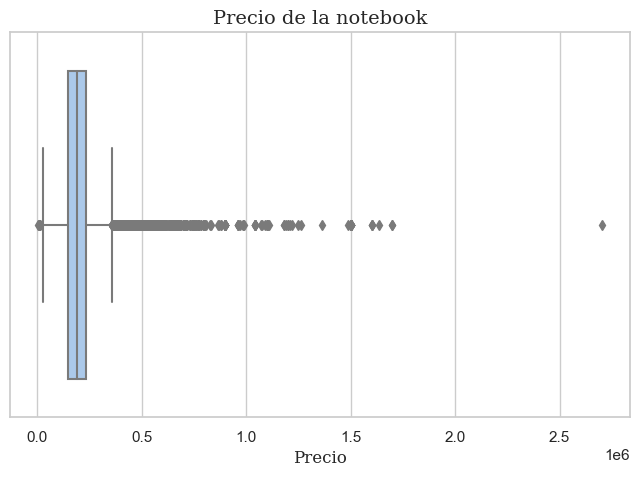

In [11]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))
ax = sns.boxplot(x="price", data=df)
ax.set_title("Precio de la notebook", size=14, family='serif')  
plt.xlabel('Precio', size=12, family='serif')  
plt.show()

In [12]:
df[df.price > 2500000]

,id,title,seller_id,price,base_price,deal_ids,initial_quantity,sold_quantity,listing_type_id,available_quantity,sold_quantity.1,sale_terms,condition,installment,display_size,shipping_cost,descriptions,attributes,warnings,status,date_created,shipping.mode,shipping.free_shipping,Tipo de batería,Marca,Cantidad de núcleos,Resolución de la pantalla,Tamaño de la pantalla,Tipo de pantalla,Tarjeta gráfica,Es 2 en 1,Es gamer,Es ultrabook,Condición del ítem,Línea,Modelo,Edición del sistema operativo,Nombre del sistema operativo,Versión del sistema operativo,Marca del procesador,Línea del procesador,Memoria RAM,Tipo de memoria RAM,Capacidad del SSD,Cantidad total de puertos USB,Peso,Con Bluetooth,Con puerto ethernet,Con HDMI,Con salida para auriculares,Con lector de tarjeta de memoria,Con micrófono,Con pantalla táctil,Con cámara web,Con Wi-Fi,Profundidad,Altura,Modos de sonido,Puertos USB,Puertos de video,Ancho,Con USB,Modelo del procesador,Tipo de garantía_x,Tiempo de garantía_x,Tipo de garantía_y,Tiempo de garantía_y
11451,MLA1123217115,Apple Macbook Pro 16 2021 M1 Pro Ssd4tb 32gb S...,245722648,2701999.00000,2701999.00000,[],1,0,gold_pro,1,0,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",new,no_interest,entre 14.1 y 16.9,free,[],"[{'id': 'BATTERY_TYPE', 'name': 'Tipo de bater...",[],active,2022-02-11T19:25:21.000Z,me2,True,Polímero de litio,Apple,10.00000,3456 px x 2234 px,"16.2 """,NaN,Apple GPU,No,No,NaN,Nuevo,MacBook Pro,"Macbook Pro 16""",NaN,macOS,Monterey,Apple,M1 Pro,32 GB,NaN,4 TB,NaN,2.15 kg,NaN,NaN,Sí,NaN,NaN,NaN,No,NaN,NaN,24.81 cm,NaN,NaN,NaN,NaN,35.57 cm,Sí,NaN,Garantía del vendedor,6 meses,Garantía del vendedor,6 meses


Tiene sentido esta computadora que es una MAC de alto nivel, por lo tanto no la eliminaremos del dataframe.

### Marca  
Como existen muchas marcas se procede a agrupar aquellas que aparezcan menos de 100 veces, bajo el nombre "Otros". Se entiende que las marcas más populares estan dentro de las que tienen mas de 100 y que no sería tan relevante dejar el nombre de una marca que aparece menos de 100 veces.

In [13]:
marcas = df.Marca.value_counts().to_frame()
marcas["condicion"] = marcas.index
marcas.loc[marcas["Marca"] < 100, "condicion"] = "Otro"
marcas = marcas.rename_axis('Marca_Original').reset_index()
marcas.columns = ["Marca_Original", "Cantidad", "Marca_Nueva"]
marcas.tail()

del marcas["Cantidad"]

In [14]:
df = df.merge(marcas,
         how = "left",
         left_on = "Marca",
         right_on = "Marca_Original")


In [15]:
del df["Marca_Original"], df["Marca"]
df.rename(columns = {"Marca_Nueva" : "Marca"}, inplace = True)

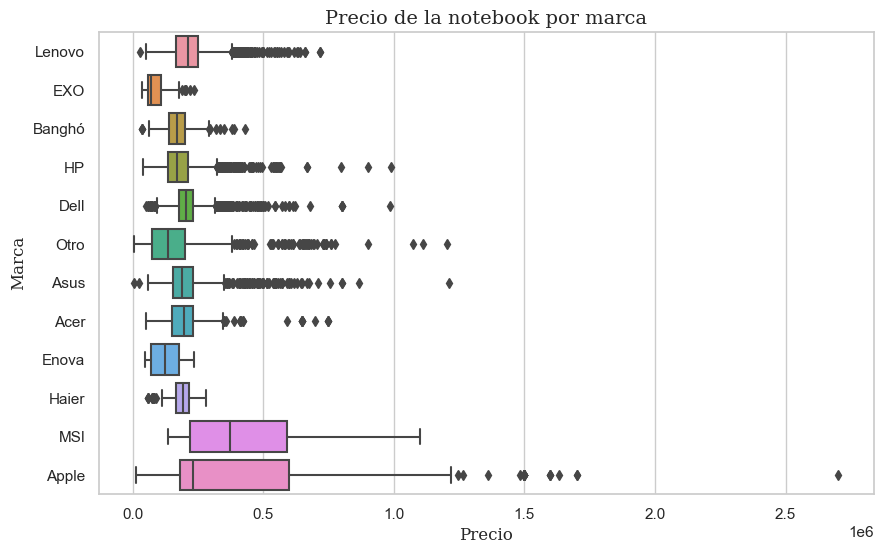

In [16]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(10,6))
ax = sns.boxplot(x="price", data=df, y = "Marca")  
ax.set_title("Precio de la notebook por marca", size=14, family='serif') 
plt.ylabel('Marca', size=12, family='serif')  
plt.xlabel('Precio', size=12, family='serif')  
plt.show()

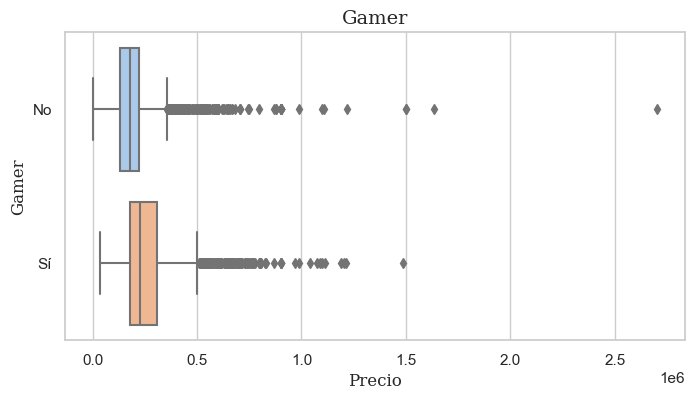

In [17]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))
ax = sns.boxplot(x="price", data=df[df["price"] < 1.000000e+07], y = "Es gamer")
ax.set_title("Gamer", size=14, family='serif') 
plt.ylabel('Gamer', size=12, family='serif')  
plt.xlabel('Precio', size=12, family='serif')  
plt.show()

## Procesador

In [18]:
df = df.rename(columns= {"Línea del procesador" : "linea_procesador"})
df.linea_procesador.isna().sum()

1819

In [19]:
df = normalizar_lineas_procesador(df, "linea_procesador")
df.linea_procesador.isna().sum()

1819

In [20]:
df = df.rename(columns= {"Modelo del procesador" : "modelo_procesador"})
df.modelo_procesador.isna().sum()

7877

In [21]:
df = normalizar_lineas_procesador(df, "modelo_procesador")
df.modelo_procesador.isna().sum()

7877

In [22]:

df = normalizar_lineas_procesador(df, "modelo_procesador")
df.modelo_procesador.isna().sum()

7877

In [26]:
cm1 = (df.modelo_procesador == "M1")
cotro = (df.linea_procesador == "Otro")

df.loc[cm1 & cotro, "linea_procesador"] = "M1"

In [28]:
df.linea_procesador.value_counts()

Core i5    2769
Core i3    1880
Core i7    1531
Ryzen 5    1008
Celeron     997
Otro        347
Ryzen 7     315
Ryzen 3     283
Athlon      278
Pentium     218
AMD A6       79
M1           50
Name: linea_procesador, dtype: int64

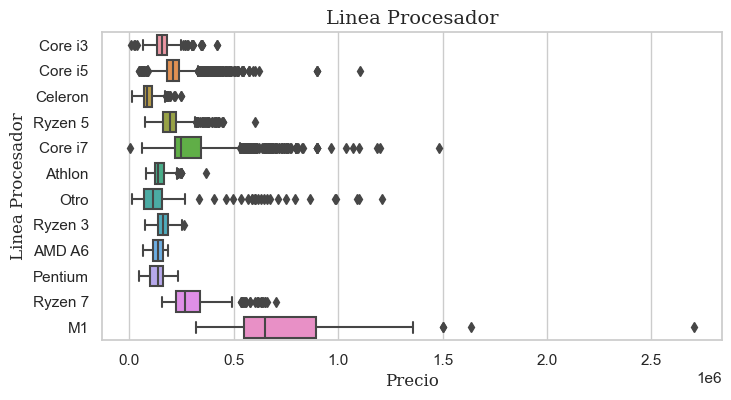

In [27]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))
ax = sns.boxplot(x="price", data=df, y = "linea_procesador")
ax.set_title("Linea Procesador", size=14, family='serif') 
plt.ylabel('Linea Procesador', size=12, family='serif')  
plt.xlabel('Precio', size=12, family='serif')  
plt.show()

In [21]:
df["Memoria RAM"].head()

0    8 GB
1    8 GB
2    4 GB
3    4 GB
4    8 GB
Name: Memoria RAM, dtype: object

### RAM

In [23]:
df = separar_valor_ram(df,"Memoria RAM", 'Capacidad RAM', 'Medida_RAM')

<Figure size 800x400 with 0 Axes>

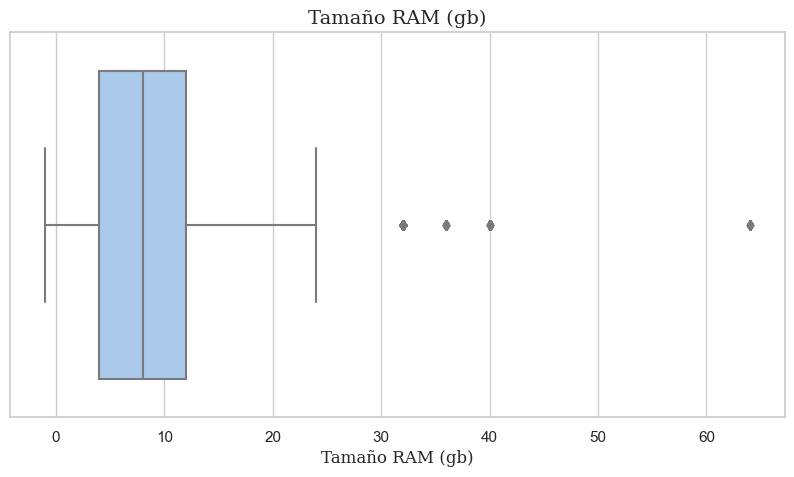

In [28]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Capacidad RAM", data=df)
ax.set_title("Tamaño RAM (gb)", size=14, family='serif') 
plt.xlabel('Tamaño RAM (gb)', size=12, family='serif')  
plt.show()

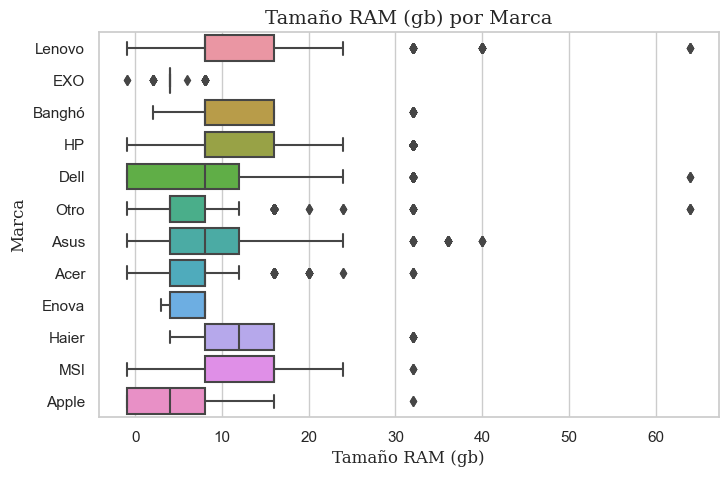

In [31]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="Capacidad RAM", data=df[df["Capacidad RAM"] < 129], y = "Marca")
ax.set_title("Tamaño RAM (gb) por Marca", size=14, family='serif') 
plt.xlabel('Tamaño RAM (gb)', size=12, family='serif')  
plt.ylabel('Marca', size=12, family='serif')  
plt.show()

### Peso

# NORMALIZAR EL PESO Y LUEGO SEGUIR CON EL RESTO DE LOS QUE PUSE EN EL CUESTIONARIO

In [31]:
df.Peso.head()

0     1.6 kg
1     1.6 kg
2     1350 g
3     1.3 kg
4    1.46 kg
Name: Peso, dtype: object

In [30]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Peso de la notebook", data=df)
ax.set_title("Peso", size=14, family='serif') 
plt.xlabel('Tamaño RAM (gb)', size=12, family='serif')  
plt.show()

Index(['id', 'title', 'seller_id', 'price', 'base_price', 'deal_ids',
       'initial_quantity', 'sold_quantity', 'listing_type_id',
       'available_quantity', 'sold_quantity.1', 'sale_terms', 'condition',
       'installment', 'display_size', 'shipping_cost', 'descriptions',
       'attributes', 'warnings', 'status', 'date_created', 'shipping.mode',
       'shipping.free_shipping', 'Tipo de batería', 'Cantidad de núcleos',
       'Resolución de la pantalla', 'Tamaño de la pantalla',
       'Tipo de pantalla', 'Tarjeta gráfica', 'Es 2 en 1', 'Es gamer',
       'Es ultrabook', 'Condición del ítem', 'Línea', 'Modelo',
       'Edición del sistema operativo', 'Nombre del sistema operativo',
       'Versión del sistema operativo', 'Marca del procesador', 'Memoria RAM',
       'Tipo de memoria RAM', 'Capacidad del SSD',
       'Cantidad total de puertos USB', 'Peso', 'Con Bluetooth',
       'Con puerto ethernet', 'Con HDMI', 'Con salida para auriculares',
       'Con lector de tarjeta de m